In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

# list directories where packages are stored
# note that the parent directory of te repo is added automatically
GYM_FOLDER = "gym-t99"

# get this notebook's current working directory
nb_cwd = os.getcwd()
# get name of its parent directory
nb_parent = os.path.dirname(nb_cwd)
# add packages to path
sys.path.insert(len(sys.path), nb_parent)
sys.path.insert(len(sys.path), os.path.join(nb_parent, GYM_FOLDER))

In [3]:
import gym
registered = gym.envs.registration.registry.env_specs.copy()

import gym_t99
import t_net

pygame 2.0.1 (SDL 2.0.14, Python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
import imp

# this code removes environment from gym's registry
env_dict = gym.envs.registration.registry.env_specs.copy()
for env in env_dict:
    if env not in registered:
        print("Remove {} from registry".format(env))
        del gym.envs.registration.registry.env_specs[env]

imp.reload(gym_t99)

Remove basic-v0 from registry
Remove t99-v0 from registry
Remove t99sc-v0 from registry


<module 'gym_t99' from '/Users/surajvathsa/Projects/DL-stuff/RL/239AS_T99_RL_Agent/gym-t99/gym_t99/__init__.py'>

In [5]:
# import matplotlib
import matplotlib as plt
# configure matplotlib
%matplotlib inline

In [6]:
import numpy as np
from copy import deepcopy

In [7]:
# import torch
import torch
from torch import nn

# configure torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [9]:
# a simple random agent to play aginst and test
class RandomEnemySC:    
    # this interface needs to be supported for any agent
    def action(self, observation):
        return np.random.choice(observation)

In [179]:
custom_gym = gym.make('gym_t99:t99sc-v0', num_players = 1, enemy=RandomEnemySC())

In [73]:
frame = custom_gym.render(mode="debug")
# frame[0][-4, 2:6] = 1
print(frame[0])

[[10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  2  2  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  2  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  2  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0

In [74]:
action = {
    "reward": 0,
    "state": deepcopy(custom_gym.state)
}

observations, reward, done, _ = custom_gym.step(action)

In [75]:
print(observations[0][2].players[0].board)

[[10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0

In [76]:
def get_holes(board):
    num_holes = 0
    for col in range(3, board.shape[1]-3):
        row = 0
        while row < board.shape[0] - 3 and board[row][col] == 0:
            row += 1
        while row < board.shape[0] - 3:
            if board[row][col] == 0:
                num_holes += 1
            row += 1
    return num_holes

In [77]:
def get_bumpiness_and_height(board):
    mask = board != 0
    invert_heights = np.where(mask.any(axis=0), np.argmax(mask, axis=0), board.shape[0])
    heights = board.shape[0] - invert_heights
    total_height = np.sum(heights)
    currs = heights[:-1]
    nexts = heights[1:]
    diffs = np.abs(currs - nexts)
    total_bumpiness = np.sum(diffs)
    return total_bumpiness, total_height

def bumpiness(board):
    '''Sum of the differences of heights between pair of columns'''
    total_bumpiness = 0
    max_bumpiness = 0
    min_ys = []

    for col in zip(*board[:board.shape[0]-3, 3:board.shape[1]-3]):
        i = 0
        while i < board.shape[0] and col[i] == 0:
            i += 1
        min_ys.append(i)

    for i in range(len(min_ys) - 1):
        bumpiness = abs(min_ys[i] - min_ys[i+1])
        max_bumpiness = max(bumpiness, max_bumpiness)
        total_bumpiness += abs(min_ys[i] - min_ys[i+1])

    return total_bumpiness, max_bumpiness

In [78]:
# num lines cleared -> obs[0][-1]
def calculate_features(player):
    
    board = player.board
    num_lines_cleared = player.num_lines_cleared
    num_holes = get_holes(board)
    total_bumpiness, total_height = get_bumpiness_and_height(board)

    
    return np.array([num_holes, total_bumpiness, total_height, num_lines_cleared])

In [79]:
def calculate_next_state_features(next_states):
    next_state_features = []
    for state in next_states:
        features = calculate_features(state.players[0])
        next_state_features.append(features)
    return next_state_features

In [201]:
"""
@author: Viet Nguyen <nhviet1009@gmail.com>
"""
import torch.nn as nn

class DQN(nn.Module):
    def __init__(self, n_actions):
        super(DQN, self).__init__()

        self.layer1 = nn.Sequential(nn.Linear(4, 64), nn.ReLU(inplace=True))
        self.layer2 = nn.Sequential(nn.Linear(64, 64), nn.ReLU(inplace=True))
        self.layer3 = nn.Sequential(nn.Linear(64, 1))

        self._create_weights()

    def _create_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        return x

In [202]:
from collections import namedtuple
# Transition is same as experience.
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):
    """A cyclic buffer i.e. newer experiences over-write 
    the older experiences when the capacity of ReplayMemory
    is reached.
    """
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        if len(self.memory) < self.capacity:
            self.memory.append(None)
    
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1)%self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [206]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from random import randint

BATCH_SIZE = 512
GAMMA = 0.95
EPS_START = 1
EPS_END = 0
EPS_STOP_EPISODE = 500
TARGET_UPDATE = 1 # How often we update the target network 

# Get number of actions from gym action space
n_actions = 5

policy_net = DQN(n_actions).to(device)
target_net = DQN(n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = torch.optim.Adam(policy_net.parameters(), lr=0.001)
criterion = nn.MSELoss()
memory = ReplayMemory(30000)

steps_done = 0
eps_threshold = (EPS_START - EPS_END) / EPS_STOP_EPISODE
eps = EPS_START


def select_action(next_states):
    """Follows Epsilon-Greedy selection strategy
    """
    global steps_done
    global eps_threshold
    global eps
    
    sample = random.random()
    
    
    steps_done += 1
    
    next_states = [torch.from_numpy(next_state) for next_state in next_states]
    index = None
    if sample > eps: # Greedy
        with torch.no_grad():
            index = randint(0, len(next_states) - 1)
    else:
        next_states = torch.stack(next_states).type(torch.FloatTensor)
        predictions = policy_net(next_states)[:, 0]
        index = torch.argmax(predictions).item()
    
    if eps > EPS_END:
        eps -= eps_threshold
    
    return index


In [207]:
import math
import random
from itertools import count

def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE) # Sample a batch from memory
    
    batch = Transition(*zip(*transitions))
    
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    reward_batch = torch.cat(batch.reward)
    

    
    next_states = policy_net(state_batch)


    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    
    
    state_action_values = policy_net(state_batch)
    

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    

    
    # Compute the expected Q values using bellman equation
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute MSE Loss
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [208]:
time_lasted = []
num_episodes = 3000

for i_episode in range(num_episodes):
    # Initialize the environment and state
    custom_gym.reset()
    action = {
        "reward": 0,
        "state": deepcopy(custom_gym.state)
    }

    observations, reward, done, _ = custom_gym.step(action)

    current_state = custom_gym.state
    next_states, next_state_rewards = observations
    for t in count():

        next_state_features = calculate_next_state_features(next_states)
        
        next_state_index = select_action(next_state_features)
        
        
        action = {
            "reward" : next_state_rewards[next_state_index],
            "state" : next_states[next_state_index]
        }
        

        new_next_states, reward, done, _ = custom_gym.step(action)
        
        if reward != 1:
            print(reward)
        
        reward = torch.tensor([reward], device=device).type(torch.FloatTensor)
        

        
        # Observe new state
#         if not done:
#             next_state = torch.from_numpy(calculate_features(obs)).type(torch.FloatTensor)
#             save_next_state = torch.unsqueeze(next_state, 0)
#         else:
#             next_state = None
#             save_next_state = None

        if not done:
            save_next_state = torch.unsqueeze(torch.tensor(calculate_features(next_states[next_state_index].players[0])).type(torch.FloatTensor), 0) 
        else:
            save_next_state = None
            

        # Store the transition in memory
        memory.push(
            torch.unsqueeze(torch.tensor(calculate_features(current_state.players[0])).type(torch.FloatTensor), 0), 
            action, 
            save_next_state, 
            reward
        )

        # Move to the next state
        current_state = next_states[next_state_index]
        next_states, next_state_rewards = new_next_states

        # Perform one step of the optimization (on the policy network)
        optimize_model()
        

        if done:
            time_lasted.append(t)
            if i_episode % 100 == 0 and i_episode != 0:
                frame = custom_gym.render(mode="debug")
                print(frame[0])
            break
    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())


print('Complete')
custom_gym.close()

17
17
17
17
17
[[10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  4  4  4  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  4  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  3  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  3  3  3  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  6  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  6  6  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  6  1  1  1  1 10 10 10]
 [10 10 10  0  0  0  1  1  1  1  0  0  0 10 10 10]
 [10 10 10  0  2  2  0  0  2  0  0  0  0 10 10 10]
 [10 10 10  0  2  0  0  0  2  2  2  0  0 10 10 10]
 [10 10 10  0  2  0  0  0  4  0  0  0  0 10 10 10]
 [10 10 10  1  1  1  1  4  4  4  0  0  0 10 10 10]
 [10 10 10  5  5  0  0  2  0  0  0  2  2 10 10 10]
 [10 10 10  0  5  5  0  2  2  2  0  2  0 10 10 10]
 [10 10 10  0  7  7  0  0  6  6  0  2  0 10 10 10]
 [10 10 10  0  7  7  0  6  6  0  7  7  0 10 10 10]
 [10 10 10  0  0  6  6  2  0  0  7  7  0 10 10 10]
 [10 10 10  0  6

KeyboardInterrupt: 

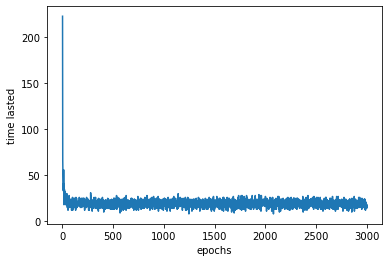

In [191]:
import matplotlib.pyplot as plt

plt.figure()
xs = [i for i in range(1, 3001)]
plt.plot(xs, time_lasted)
plt.xlabel("epochs")
plt.ylabel("time lasted")
plt.show()

In [178]:
print(time_lasted)

[157, 76, 43, 36, 65, 45, 42, 55, 50, 36, 51, 38, 38, 34, 28, 34, 37, 30, 29, 34, 21, 30, 28, 30, 27, 31, 28, 21, 24, 39, 28, 25, 27, 25, 23, 25, 22, 19, 32, 26, 22, 27, 22, 26, 17, 23, 20, 25, 23, 19, 19, 21, 17, 21, 18, 25, 21, 19, 19, 14, 18, 16, 20, 17, 21, 20, 23, 22, 27, 14, 23, 12, 11, 13, 20, 16, 21, 17, 22, 19, 23, 18, 16, 19, 23, 15, 25, 20, 16, 15, 21, 14, 19, 20, 19, 22, 18, 19, 23, 20, 19, 19, 14, 20, 24, 13, 18, 16, 11, 18, 24, 16, 18, 15, 22, 15, 19, 26, 16, 22, 23, 19, 25, 19, 21, 21, 20, 20, 22, 19, 18, 19, 24, 27, 17, 18, 21, 28, 19, 24, 18, 10, 21, 20, 19, 17, 19, 8, 14, 17, 16, 22, 13, 21, 13, 17, 22, 18, 24, 25, 20, 19, 17, 17, 18, 18, 18, 18, 24, 21, 18, 22, 21, 25, 24, 24, 21, 14, 14, 18, 18, 23, 16, 18, 13, 14, 20, 19, 20, 18, 11, 22, 27, 22, 19, 25, 20, 23, 22, 15, 16, 20, 18, 20, 21, 18, 20, 16, 16, 14, 22, 21, 16, 17, 18, 18, 22, 16, 19, 21, 18, 12, 24, 21, 17, 16, 23, 17, 15, 21, 22, 24, 23, 18, 19, 20, 17, 13, 16, 13, 16, 21, 19, 16, 19, 21, 17, 16, 16, 19,